# Análise Espanha

Neste notebook será feito a análise temporal e modelagem da Espanha, a partir de um base de dados do Kaggle em que foi filtrado somente sobre a Espanha

In [ ]:
!pip install pymannkendall # Intalando essa blibioteca para fazer teste de tendência

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importando as blibiotecas
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymannkendall as mk
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
serie_esp = pd.read_csv('Séries Temporais Espanha.csv')
serie_esp.drop('Unnamed: 0',axis=1,inplace=True)
serie_esp.head()

,Date,Confirmed,Recovered,Deaths,Ano,Mês
0,2020-01-22,0,0.0,0,2020,1
1,2020-01-23,0,0.0,0,2020,1
2,2020-01-24,0,0.0,0,2020,1
3,2020-01-25,0,0.0,0,2020,1
4,2020-01-26,0,0.0,0,2020,1


In [ ]:
serie_esp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       713 non-null    object 
 1   Confirmed  713 non-null    int64  
 2   Recovered  713 non-null    float64
 3   Deaths     713 non-null    int64  
 4   Ano        713 non-null    int64  
 5   Mês        713 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 33.5+ KB


In [ ]:
# Transformado a coluna date de object para datetime
serie_esp['Date'] = pd.to_datetime(serie_esp['Date'],format='%Y-%m-%d')

In [ ]:
# Colocando a coluna da data para indice
serie_esp.set_index('Date',inplace=True)
serie_esp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 713 entries, 2020-01-22 to 2022-01-03
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Confirmed  713 non-null    int64  
 1   Recovered  713 non-null    float64
 2   Deaths     713 non-null    int64  
 3   Ano        713 non-null    int64  
 4   Mês        713 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 33.4 KB


In [ ]:
serie_esp.head()

,Confirmed,Recovered,Deaths,Ano,Mês
Date,,,,,
2020-01-22,0,0.0,0,2020,1
2020-01-23,0,0.0,0,2020,1
2020-01-24,0,0.0,0,2020,1
2020-01-25,0,0.0,0,2020,1
2020-01-26,0,0.0,0,2020,1


## Aplicando o teste aos  Casos Confirmados e Mortes

### Sobre o Teste

O Teste Mann-Kendall (Mann, 1945; Kendall, 1975) é utilizado para determinar se uma série de dados possui tendência temporal estatisticamente significativa, como, por exemplo, a análise de dados de monitoramento de águas superficiais ou subterrânea, visando determinar se concentrações de um contaminante químico apresentam tendência de diminuição, tendência de aumento ou ausência de tendência ao longo do tempo. 

Mais informações sobre o teste, clicar [aqui](https://www.pangeo.com.br/single-post/mann-kendall-o-off-road-dos-m%C3%A9todos-de-an%C3%A1lise-de-tend%C3%AAncia).

In [ ]:
# Aplicando para casos confirmados
resultado_conf = mk.original_test(serie_esp['Confirmed'])

nomes = ['Tendência','Presença de tendência','p-valor','Estatística do teste',
         'Tau Kendall','Pontuação Kendall','Variância S','Declive','Intercepto']


for i,j in zip(nomes,resultado_conf):
  print(i,":",j)

Tendência : increasing
Presença de tendência : True
p-valor : 0.0
Estatística do teste : 39.85114508103924
Tau Kendall : 0.9973919346959358
Pontuação Kendall : 253166.0
Variância S : 40357636.0
Declive : 9146.64
Intercepto : -1118983.8399999999


In [ ]:
# Aplicando para óbitos 
resultado_mortes = mk.original_test(serie_esp['Deaths'])

for i,j in zip(nomes,resultado_mortes):
  print(i,":",j)

Tendência : increasing
Presença de tendência : True
p-valor : 0.0
Estatística do teste : 39.6326991273385
Tau Kendall : 0.9918330523031345
Pontuação Kendall : 251755.0
Variância S : 40350178.333333336
Declive : 136.82790697674417
Intercepto : 3972.2651162790717


In [ ]:
serie_esp['Deaths']

Date
2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
              ...  
2021-12-30    89405
2021-12-31    89405
2022-01-01    89405
2022-01-02    89405
2022-01-03    89573
Name: Deaths, Length: 713, dtype: int64

Como o p valor ficou abaixo de 5% nos dois casos, então é rejaitado a hipotese de tendência nula, e como pontuação kendall é positiva, logo, tanto os casos confirmados quanto de mortes é de uma tendência positiva.

### Fazendo a Decomposição

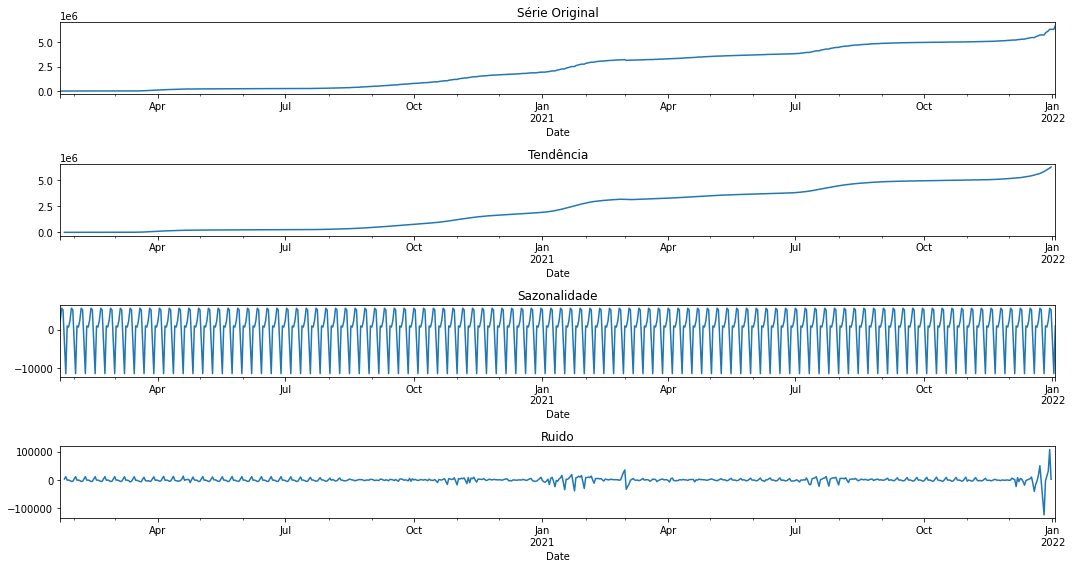

In [ ]:
decom_conf = seasonal_decompose(serie_esp['Confirmed'])

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
decom_conf.observed.plot(ax=ax1,title='Série Original')
decom_conf.trend.plot(ax=ax2,title='Tendência')
decom_conf.seasonal.plot(ax=ax3,title='Sazonalidade')
decom_conf.resid.plot(ax=ax4,title='Ruido')
plt.tight_layout()

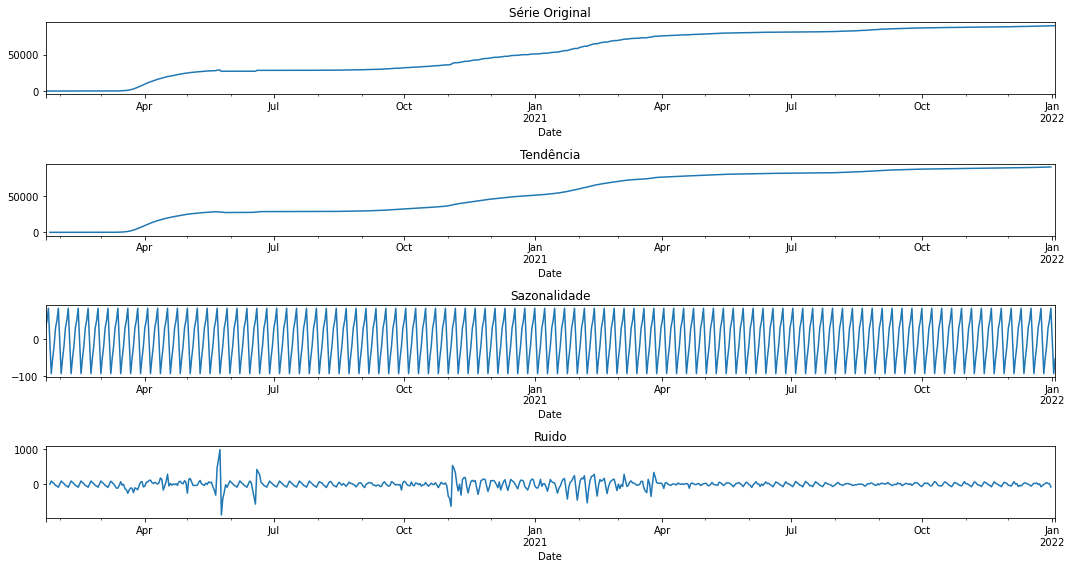

In [ ]:
decom_morte = seasonal_decompose(serie_esp['Deaths'])

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
decom_morte.observed.plot(ax=ax1,title='Série Original')
decom_morte.trend.plot(ax=ax2,title='Tendência')
decom_morte.seasonal.plot(ax=ax3,title='Sazonalidade')
decom_morte.resid.plot(ax=ax4,title='Ruido')
plt.tight_layout()

In [ ]:
treino = serie_esp[(serie_esp['Ano']<=2021)&(serie_esp['Mês']<12)]
teste = serie_esp[(serie_esp['Ano']==2021)&(serie_esp['Mês'] == 12)]

## Ad Fuller

Teste para verificar se as séries é estacionária ou não

Link para acessar a página no qual me basei pode ser acessado [aqui](https://maxwellpaparelli.medium.com/time-series-s%C3%A9ries-temporais-com-python-f4e74fd45b0b).

In [ ]:
adf_conf = adfuller(serie_esp['Confirmed'])

print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(adf_conf[0]))
print('Valor-p: {:.4f}'.format(adf_conf[1]))
print('Valores Críticos:')
for key, value in adf_conf[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Dickey-Fuller Aumentado
Teste Estatístico: 1.6806
Valor-p: 0.9981
Valores Críticos:
	1%: -3.4398
	5%: -2.8657
	10%: -2.5690


In [ ]:
adf_mort = adfuller(serie_esp['Deaths'])

print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(adf_mort[0]))
print('Valor-p: {:.4f}'.format(adf_mort[1]))
print('Valores Críticos:')
for key, value in adf_mort[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Dickey-Fuller Aumentado
Teste Estatístico: -1.7321
Valor-p: 0.4146
Valores Críticos:
	1%: -3.4398
	5%: -2.8657
	10%: -2.5690


Pelo que o teste mostra, a série não é estacionari, mas como se está desenvolvendo uma baseline, só usaremos a métrica para em um futuro fazer ajustes.

In [ ]:
df_diff_co = serie_esp['Confirmed'].diff(1)
df_diff_mor = serie_esp['Deaths'].diff(1)

In [ ]:
lag_acf_co = acf(df_diff_co.dropna(), nlags=25)
lag_pacf_co = pacf(df_diff_mor.dropna(), nlags=25)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


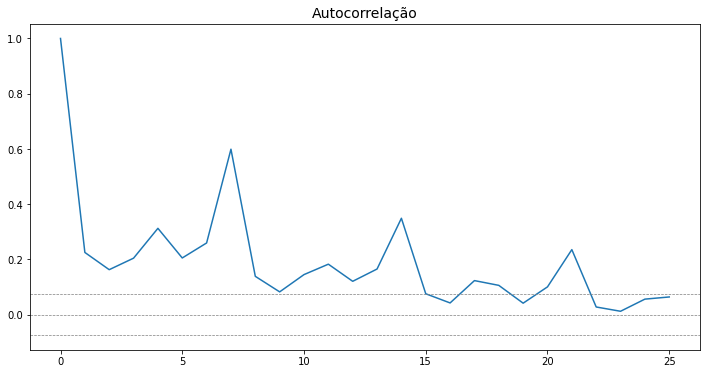

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(lag_acf_co)
plt.axhline(y=-1.96 / (np.sqrt((len(df_diff_co) - 1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96 / (np.sqrt((len(df_diff_co) - 1))), linestyle='--', color='gray', linewidth=0.7)
plt.title("Autocorrelação",fontsize=14)
plt.show()

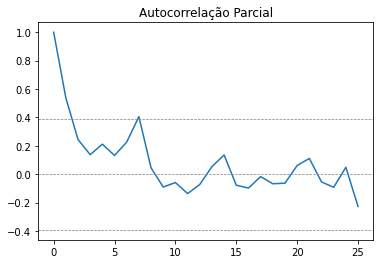

In [ ]:
plt.plot(lag_pacf_co)
plt.axhline(y=-1.96 / (np.sqrt((len(lag_pacf_co ) - 1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96 / (np.sqrt((len(lag_pacf_co ) - 1))), linestyle='--', color='gray', linewidth=0.7)
plt.title("Autocorrelação Parcial")
plt.show()

In [ ]:
model = ARIMA(treino['Deaths'], order=(1,1,1))
result_AR = model.fit(disp = -1)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [ ]:
fc, se, conf = result_AR .forecast(31, alpha=0.05)

In [ ]:
mape = np.mean(np.abs(fc - teste['Deaths'].values)/np.abs(teste['Deaths'].values))
mae = np.mean(np.abs(fc - teste['Deaths'].values)) 
rmse = np.mean((fc - teste['Deaths'])**2)**.5
print(mape)
print(mae)
print(rmse)

0.004044478127650544
359.5144098207355
417.8539575277465


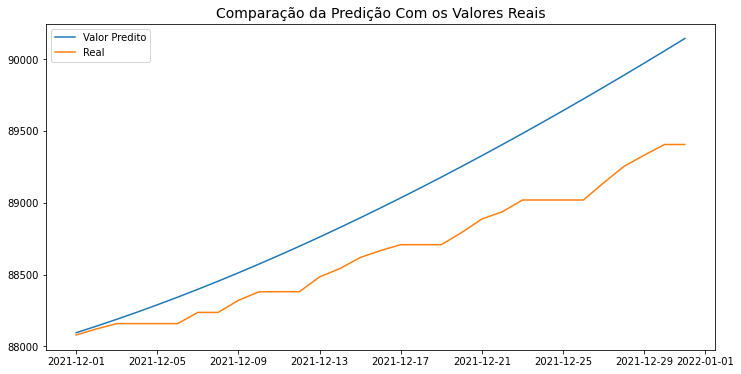

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Comparação da Predição Com os Valores Reais', fontsize=14)
plt.plot(teste.index,fc,label='Valor Predito')
plt.plot(teste.index,teste['Deaths'].values,label='Real')
plt.legend()